<a href="https://colab.research.google.com/github/websitegardener/project/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Upload your local copy of score.db
from google.colab import files
files.upload()

### Importing Libraries

In [353]:
import pandas as pd
import sqlite3
import numpy as np
import scipy
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

In [354]:
warnings.filterwarnings('ignore')

### Reading in the Data

In [355]:
con = sqlite3.connect('score.db')
cur = con.cursor()
df = pd.read_sql_query("SELECT * from score", con).set_index('index')

### Basic Information

In [356]:
# Display the number of rows and columns for the dataset
print("Rows & Columns: {}".format(df.shape))

Rows & Columns: (15900, 17)


In [357]:
# Display the datatypes for the columns in the dataframe
df.dtypes

number_of_siblings      int64
direct_admission       object
CCA                    object
learning_style         object
student_id             object
gender                 object
tuition                object
final_test            float64
n_male                float64
n_female              float64
age                   float64
hours_per_week        float64
attendance_rate       float64
sleep_time             object
wake_time              object
mode_of_transport      object
bag_color              object
dtype: object


About the 'Direct_admission' column: 


---


Students who have "Yes" in 'direct_admission' are students who entered their current school based on their talents in sports, CCAs or specific academic areas (science, engineering, maths).


In [358]:
# simple statistic for categorical data
df.describe(exclude=[np.number]).T

,count,unique,top,freq
direct_admission,15900,2,No,11195
CCA,15900,8,Clubs,3912
learning_style,15900,2,Auditory,9132
student_id,15900,15000,CNXIXG,2
gender,15900,2,Male,7984
tuition,15900,4,Yes,8669
sleep_time,15900,13,23:00,3131
wake_time,15900,5,5:00,3246
mode_of_transport,15900,3,public transport,6371
bag_color,15900,6,yellow,2731


We found duplicates in the 'student_id' column.

In [250]:
# number of entries for each of the column. 
df.count()

number_of_siblings    15900
direct_admission      15900
CCA                   15900
learning_style        15900
student_id            15900
gender                15900
tuition               15900
final_test            15405
n_male                15900
n_female              15900
age                   15900
hours_per_week        15900
attendance_rate       15122
sleep_time            15900
wake_time             15900
mode_of_transport     15900
bag_color             15900
dtype: int64

There are missing values in the 'final_test' and 'attendance_rate' columns.

In [204]:
# number of unique values for each of the columns
print(df.nunique())

number_of_siblings        3
direct_admission          2
CCA                       8
learning_style            2
student_id            15000
gender                    2
tuition                   4
final_test               68
n_male                   32
n_female                 32
age                       6
hours_per_week           21
attendance_rate          61
sleep_time               13
wake_time                 5
mode_of_transport         3
bag_color                 6
dtype: int64


In [205]:
# Quick look at unique values for each of the columns
print(df.apply(lambda col: col.unique()))

number_of_siblings                                            [0, 2, 1]
direct_admission                                              [Yes, No]
CCA                   [Sports, None, Clubs, Arts, ARTS, SPORTS, CLUB...
learning_style                                       [Visual, Auditory]
student_id            [ACN2BE, FGXIIZ, B9AI9F, FEVM1T, AXZN2E, BA6R1...
gender                                                   [Female, Male]
tuition                                                 [No, Yes, Y, N]
final_test            [69.0, 47.0, 85.0, 64.0, 66.0, 57.0, 76.0, 60....
n_male                [14.0, 4.0, 2.0, 24.0, 9.0, 12.0, 20.0, 13.0, ...
n_female              [2.0, 19.0, 20.0, 3.0, 12.0, 7.0, 9.0, 0.0, 4....
age                                  [16.0, 15.0, 6.0, 5.0, -4.0, -5.0]
hours_per_week        [10.0, 7.0, 8.0, 18.0, 11.0, 15.0, 3.0, 16.0, ...
attendance_rate       [91.0, 94.0, 92.0, nan, 95.0, 96.0, 93.0, 97.0...
sleep_time            [22:00, 22:30, 21:00, 21:30, 23:00, 23:30,

In [249]:
#  Display first few values of the dataframe
print(df.head())

       number_of_siblings direct_admission  ...  mode_of_transport bag_color
index                                       ...                             
0                       0              Yes  ...  private transport    yellow
1                       2               No  ...  private transport     green
2                       0              Yes  ...  private transport     white
3                       1               No  ...   public transport    yellow
4                       0               No  ...   public transport    yellow

[5 rows x 17 columns]


### Cleaning up The dataset

We can replace sleep_time and wake time by sleep_hours for better understanding of relation

In [359]:
# replacing sleep_time & wake_time by sleep_hours
df['sleep_hours'] = pd.to_datetime(df['wake_time']) - pd.to_datetime(df['sleep_time'])
df['sleep_hours'] = df['sleep_hours'].apply(lambda x: x.seconds/3600).astype("float")

# add late_sleep tag for sleep_time > 5am
df['late_sleep'] = "No"
df.loc[pd.to_datetime(df['sleep_time'])<pd.to_datetime("05:00"),'late_sleep']="Yes"

# drop columns as they are not needed
df.drop('sleep_time', axis=1, inplace=True)
df.drop('wake_time', axis=1, inplace=True)

df[df['late_sleep']=="Yes"].head() 

,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,mode_of_transport,bag_color,sleep_hours,late_sleep
index,,,,,,,,,,,,,,,,,
39,2,No,Arts,Auditory,OR5ZSX,Male,No,42.0,10.0,12.0,15.0,11.0,55.0,private transport,green,5.0,Yes
45,1,Yes,Arts,Visual,PRPPV8,Female,Yes,49.0,30.0,0.0,16.0,1.0,64.0,private transport,white,6.0,Yes
76,0,Yes,Sports,Visual,9AO05A,Female,No,49.0,12.0,8.0,16.0,14.0,55.0,private transport,blue,5.0,Yes
100,1,No,Clubs,Auditory,QM7MY8,Female,No,47.0,20.0,5.0,15.0,9.0,61.0,private transport,yellow,4.0,Yes
112,2,No,Sports,Auditory,U9XHGZ,Female,N,46.0,7.0,16.0,15.0,4.0,52.0,public transport,black,5.0,Yes


In [339]:
print("Rows & Columns: {}".format(df.shape))

Rows & Columns: (15900, 17)


In [340]:
# split columns to categorical and numerical.
target_col = 'final_test'
cat_cols = ['direct_admission', 'CCA', 'learning_style', 'gender', 'tuition', 'mode_of_transport', 'bag_color', 'late_sleep']
num_cols = ['number_of_siblings', 'n_male', 'n_female', 'age', 'hours_per_week', 'attendance_rate', 'sleep_hours']

In [360]:
# Standardize unique values in categorical columns
for col in cat_cols:
  df[col] = df[col].str.lower()

df.loc[df['tuition']=="y", 'tuition']='yes'
df.loc[df['tuition']=="n", 'tuition']='no'

df[cat_cols].apply(lambda x: x.unique())

direct_admission                                       [yes, no]
CCA                                  [sports, none, clubs, arts]
learning_style                                [visual, auditory]
gender                                            [female, male]
tuition                                                [no, yes]
mode_of_transport    [private transport, public transport, walk]
bag_color               [yellow, green, white, red, blue, black]
late_sleep                                             [no, yes]
dtype: object

In [361]:
# unique values in the age column
print(df.age.unique())

[16. 15.  6.  5. -4. -5.]


There are outlier entries in the age column (Negative age value and Ages 5 and 6). 

In [362]:
# Let's take a look at age 5 values
df[df["age"]==5]

,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,mode_of_transport,bag_color,sleep_hours,late_sleep
index,,,,,,,,,,,,,,,,,
60,2,no,arts,auditory,1B3QSS,female,yes,40.0,3.0,19.0,5.0,5.0,98.0,private transport,blue,8.0,no
81,0,no,clubs,auditory,ANUEDH,male,no,57.0,24.0,3.0,5.0,6.0,96.0,private transport,white,8.0,no
82,0,yes,none,visual,7EPPQG,female,yes,70.0,1.0,15.0,5.0,10.0,96.0,private transport,red,8.0,no
140,2,no,none,visual,TDLKDV,female,yes,72.0,6.0,13.0,5.0,10.0,99.0,private transport,yellow,8.0,no
142,1,no,none,auditory,2RE5VB,female,yes,61.0,22.0,6.0,5.0,7.0,91.0,private transport,yellow,8.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15800,0,no,none,visual,CQC2WW,female,no,96.0,4.0,15.0,5.0,9.0,94.0,walk,blue,8.0,no
15805,1,no,arts,auditory,MLOG6P,male,no,45.0,10.0,14.0,5.0,14.0,95.0,public transport,white,8.0,no
15881,1,yes,sports,visual,ODRFL1,female,yes,70.0,8.0,13.0,5.0,5.0,97.0,private transport,white,8.0,no


In [363]:
# Let's take a look at age 6 values
df[df["age"]==6]

,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,mode_of_transport,bag_color,sleep_hours,late_sleep
index,,,,,,,,,,,,,,,,,
30,2,no,sports,visual,7882P8,male,yes,NaN,20.0,2.0,6.0,14.0,91.0,public transport,green,8.0,no
61,1,no,sports,auditory,D8YD78,female,yes,57.0,24.0,6.0,6.0,11.0,95.0,public transport,white,8.0,no
83,1,no,arts,auditory,EAZDA8,female,yes,52.0,21.0,3.0,6.0,8.0,95.0,private transport,blue,8.0,no
114,0,yes,clubs,auditory,2QYBOU,female,no,72.0,17.0,2.0,6.0,10.0,97.0,public transport,black,8.0,no
145,2,no,arts,visual,FR8U8M,female,no,41.0,3.0,19.0,6.0,8.0,96.0,private transport,yellow,8.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15586,0,yes,clubs,auditory,0R2W85,male,yes,80.0,18.0,1.0,6.0,9.0,95.0,public transport,green,8.0,no
15598,2,no,sports,visual,TFWK8V,male,no,71.0,21.0,2.0,6.0,6.0,94.0,walk,white,8.0,no
15627,0,yes,none,visual,WFKUS3,female,yes,83.0,11.0,5.0,6.0,10.0,97.0,public transport,blue,8.0,no


There are more than 400 rows of students with Ages 5 and 6.
We can see that some entries have "Yes" in direct admission, so they must have graduated from their primary school. 
I assume these are incorrect data entry written as 5 instead of 15 and 6 instead of 16. 
Let's correct their value.

In [ ]:
# Correcting incorrect entries
df.age.replace(6, 16, inplace=True)
df.age.replace(5, 15, inplace=True)

In [344]:
# Count number of rows with negative age of -4
df[df["age"]==-4].count

<bound method DataFrame.count of        number_of_siblings direct_admission  ... sleep_hours late_sleep
index                                       ...                       
4513                    2               no  ...         8.0         no

[1 rows x 17 columns]>

In [345]:
# Count number of rows with negative age of -5
df[df["age"]==-5].count

<bound method DataFrame.count of        number_of_siblings direct_admission  ... sleep_hours late_sleep
index                                       ...                       
7932                    1               no  ...         8.0         no
8602                    0               no  ...         8.0         no
8663                    0              yes  ...         8.0         no
8846                    2               no  ...         8.0         no

[4 rows x 17 columns]>

As there are only a few rows with negative age values, we will drop them instead.

In [346]:
# There should not be negative age value
df = df[df.age > 0]

# after standardization
print(df.age.unique())

[16. 15.]


### Dropping Duplicate Values in Student ID Column

In [347]:
# Removing duplicates in student_id

df.drop_duplicates('student_id', keep='first', inplace=True)
print('number of student_id after duplicate removal: ', len(df))

number of student_id after duplicate removal:  14995


In [328]:
# number of unique records based on student_id
len(df.student_id.unique())

14995

### Dealing with missing values in dataset

In [348]:
df.isnull().sum()

number_of_siblings      0
direct_admission        0
CCA                     0
learning_style          0
student_id              0
gender                  0
tuition                 0
final_test            463
n_male                  0
n_female                0
age                     0
hours_per_week          0
attendance_rate       734
mode_of_transport       0
bag_color               0
sleep_hours             0
late_sleep              0
dtype: int64

We will impute 'attendance_rate' column by the average value as the student still goes to school and takes their o level exam. 

However, in the case of missing values in the 'final_test' column, we have to drop these rows because it will add biasness in our final predictions.

In [349]:
# drop 'final_test' is null
df = df[df['final_test'].notna()]
print('number of students after removing null values in final test: ', len(df))

number of students after removing null values in final test:  14532


In [350]:
# impute 'attendance_rate' by average 'attendance_rate'
avg_attendance_rate = df['attendance_rate'].mean()
df['attendance_rate'].fillna(avg_attendance_rate,inplace=True)
print('number of students after imputing values in attendance rate: ', len(df))

number of students after imputing values in attendance rate:  14532


In [351]:
df.isnull().sum()

number_of_siblings    0
direct_admission      0
CCA                   0
learning_style        0
student_id            0
gender                0
tuition               0
final_test            0
n_male                0
n_female              0
age                   0
hours_per_week        0
attendance_rate       0
mode_of_transport     0
bag_color             0
sleep_hours           0
late_sleep            0
dtype: int64

Great! Now our dataset is cleaned.

In [333]:
# After data wrangling, repeat prints
print("Rows & Columns: {}".format(df.shape))
print("################################################")
print("")
print("Number of unique values for each of the columns:")
print("")
print(df.nunique())
print("################################################")
# Check the data types
print(df.dtypes)
print("################################################")
# Display first few values
print(df.head())

Rows & Columns: (14532, 17)
################################################

Number of unique values for each of the columns:

number_of_siblings        3
direct_admission          2
CCA                       4
learning_style            2
student_id            14532
gender                    2
tuition                   4
final_test               68
n_male                   32
n_female                 32
age                       2
hours_per_week           21
attendance_rate          62
mode_of_transport         3
bag_color                 6
sleep_hours               5
late_sleep                2
dtype: int64
################################################
number_of_siblings      int64
direct_admission       object
CCA                    object
learning_style         object
student_id             object
gender                 object
tuition                object
final_test            float64
n_male                float64
n_female              float64
age                   float64
hour

## Exploratory Data Analysis

### Analysis on Categorical Columns

In [365]:
# Plot distribution of all categorical features
def plot_distribution(df, columns, cols=5, rows=2, width=20 , height=10, hspace=0.4, wspace=0.1):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    for i, column in enumerate(columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        #if feature is categorical, to plot countplot
        if df.dtypes[column] == np.object:
            sns.countplot(y=df[column])
            plt.xticks(rotation=25)
        #if feature is numerical, to plot boxplot
        else:
            sns.boxplot(df[column])
            plt.xticks(rotation=25)

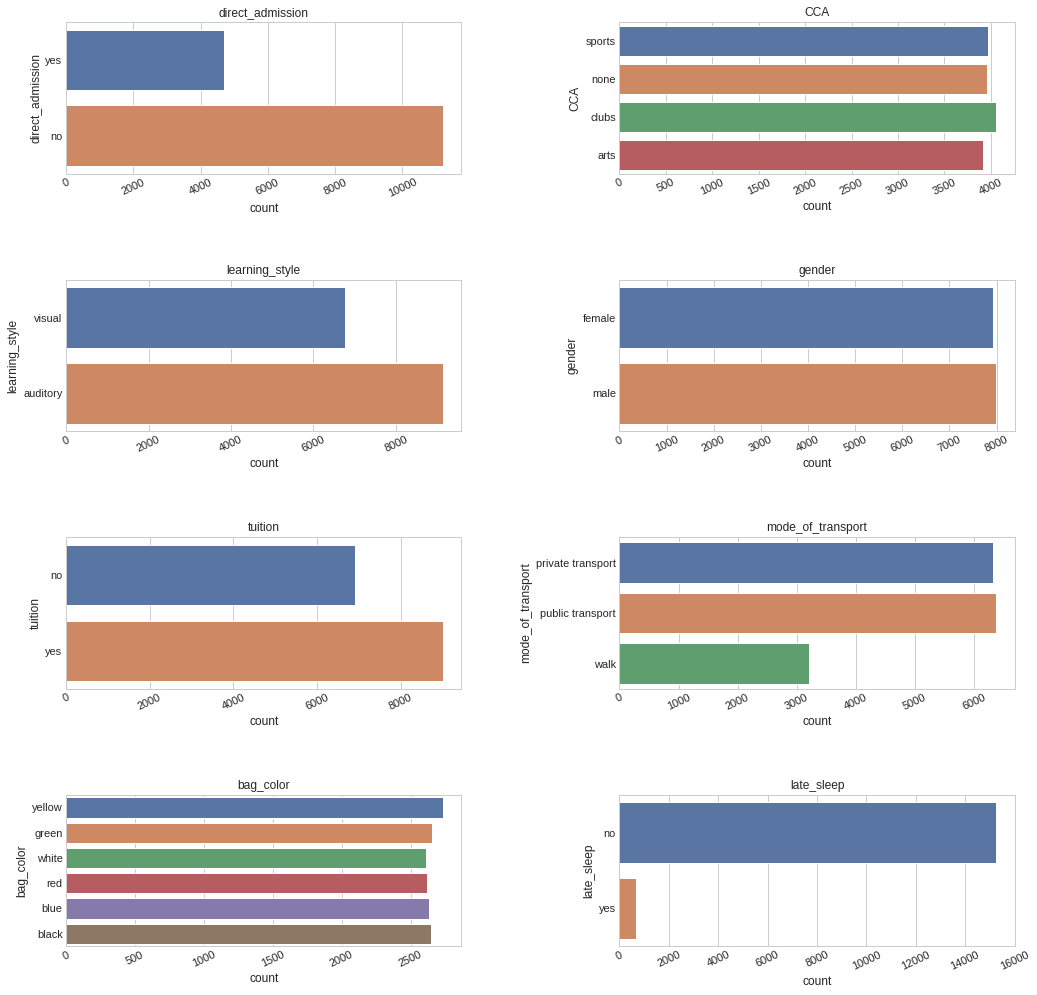

In [366]:
plot_distribution(df, cat_cols, cols=2, rows=4, width=17, height=17, hspace=0.7, wspace=0.4)

In [367]:
# create heatmap for categorical columns and try to identify features that are weakly correlated with the target_col.
data = df[np.append(cat_cols, target_col)]
index = data.columns
columns = data.columns
cv = pd.DataFrame(index=index,columns=columns)
for i in range(0, len(index)):
    for j in range(0,i):
        u = cramers_v(data[index[i]],data[columns[j]])
        cv[columns[j]][index[i]] = u

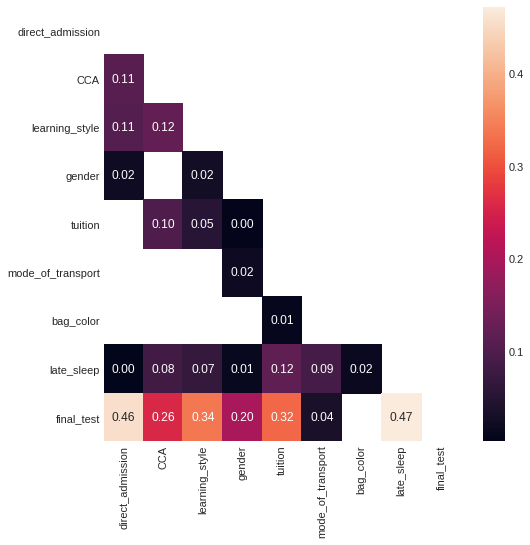

In [368]:
cv.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(8,8))
sns.heatmap(cv,annot=True,fmt='.2f')

As shown above, bag_color has no indicating power for final_test, whereas direct_admission and late_sleep are strong indictators. 

#### Distribution of test score

Let's see the distribution of test score obtained by the students.

In [369]:
sns.set(rc={'figure.figsize':(12.5, 9.5)})
sns.set_context('talk')

In [370]:
normal_distr_values = [float(value) for value in df['final_test']]

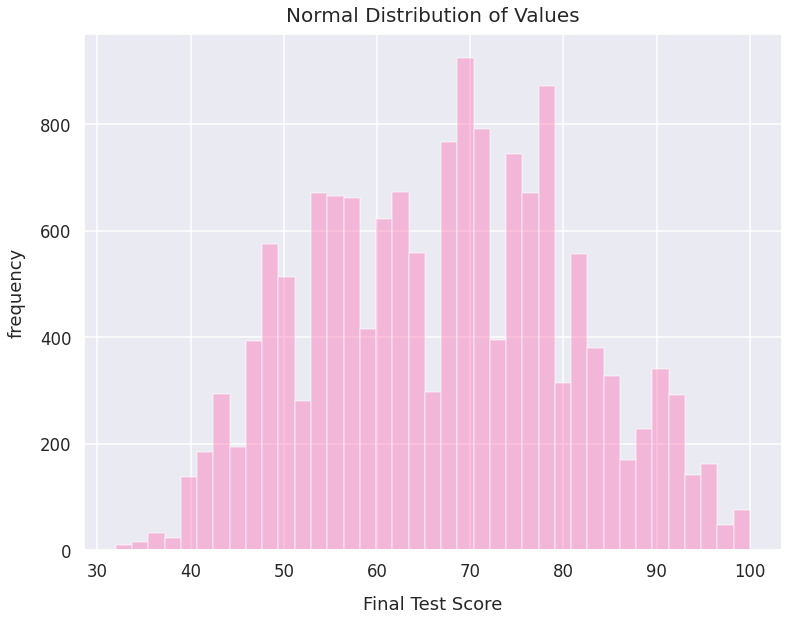

In [371]:
sns.distplot(normal_distr_values, kde=False, color='hotpink')
plt.title("Normal Distribution of Values", fontsize=20, y=1.012)
plt.xlabel("Final Test Score", labelpad=15)
plt.ylabel("frequency", labelpad=15);

We can see that most of the students have obtained score in the range of 60 to 80

#### Gender Based Analysis

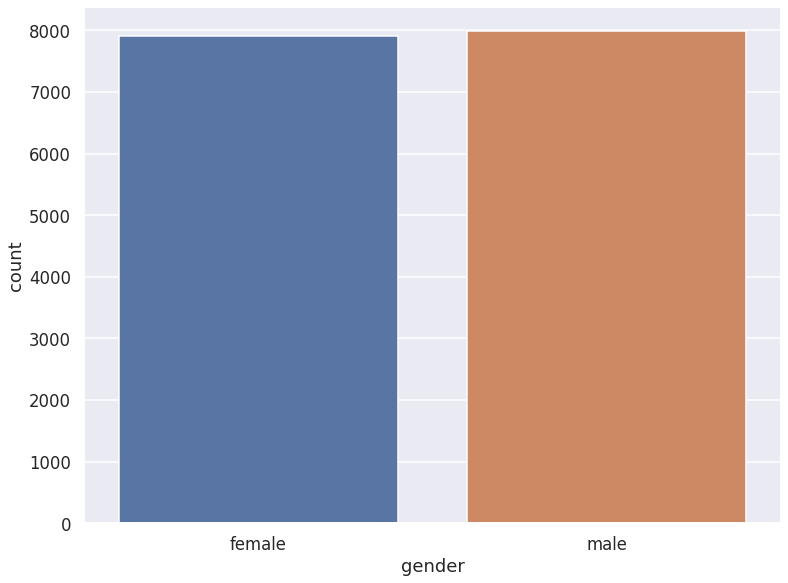

In [372]:
# Count of number of male and Female students
sns.countplot(df['gender'])

Distribution of Number of male and female students is rather equal.

Let's analyze impact of tuition on male and female students 

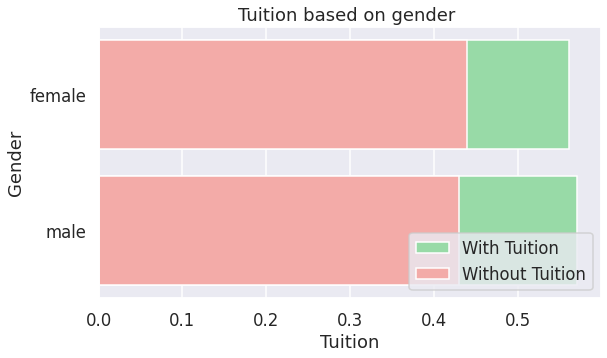

In [377]:
# Percentage of students having tuition based on gender
genders      = list(df['gender'].unique())
have_tuition = []
no_tuition   = []

for g in genders:
    g_record = df[ df['gender'] == g ]
    have_tuition.append( len(g_record[ g_record['tuition'] == 'yes' ])  / len(g_record))
    no_tuition.append(  len(g_record[ g_record['tuition'] == 'no' ]) / len(g_record) )

f,ax = plt.subplots(figsize = (9,5))
sns.set_color_codes("pastel")

sns.barplot(x=have_tuition, y=genders, color='g', label="With Tuition")
sns.barplot(x=no_tuition,   y=genders, color='r', label="Without Tuition")

ax.legend(loc="lower right",frameon = True)
ax.set(xlabel='Tuition', ylabel='Gender',title = "Tuition based on gender ")
plt.show()

Percentage of male and female students with tuition is almost the same.

---



#### Analysis on attendance rate

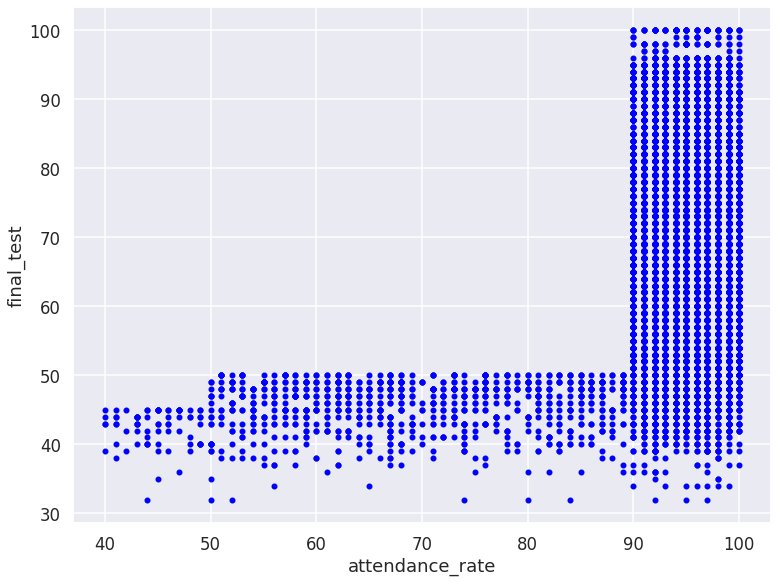

In [375]:
# impact of attendance_rate on final_test score
df.plot.scatter(x='attendance_rate', y='final_test', c='blue')

In the plot above, we can see that with increase in the attendance_rate the final_test score also increases and with decrease in the value of attendance_rate the final_test score also decreases, which shows a positive coorelation between attendance_rate and final_test score.

#### Impact of Sleep Hours

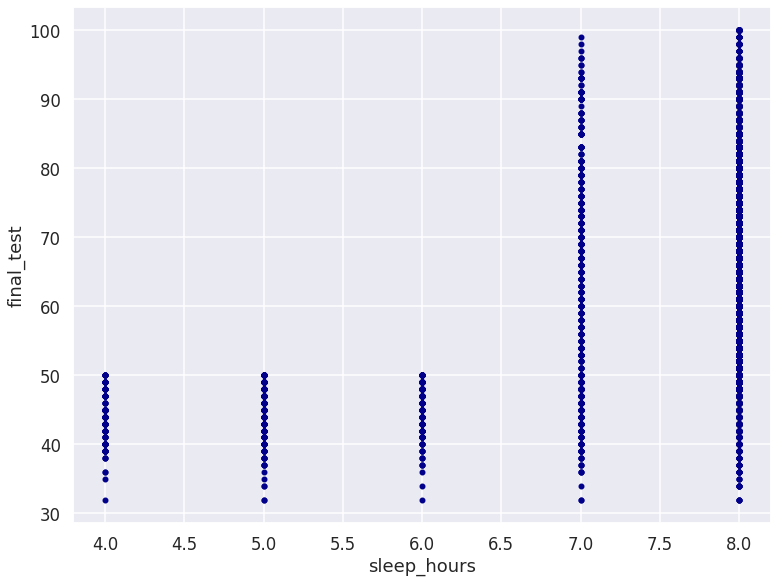

In [378]:
# impact of sleep_hours on final_test score
df.plot.scatter(x='sleep_hours', y='final_test', c='darkblue')

The impact of sleep_hours is very clear in the graph. As number of sleep_hours increases the final_test score is at peek. For lowest number of sleep_hours, the test score is also lowest.

#### Impact of number_of_siblings

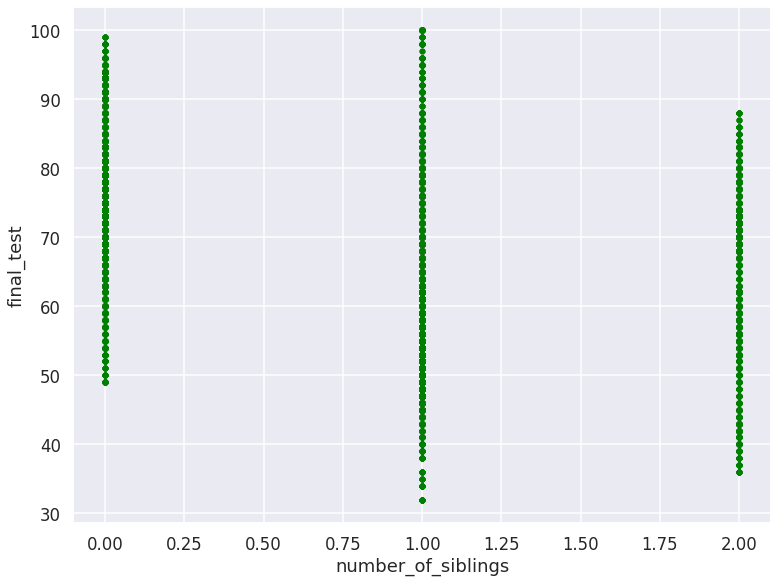

In [379]:
# impact of number of siblings on final_test score
df.plot.scatter(x='number_of_siblings', y='final_test', c='green')

There is not any major impact of number_of_siblings on final_test

#### Impact of learning_style on final_test

In [380]:
learning_styles = list(df['learning_style'].unique())
learning_styles

['visual', 'auditory']

distribution of score against learning_style:  visual
distribution of score against learning_style:  auditory


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Final Test Score'),
 Text(0.5, 1.0, 'Score Vs learning style')]

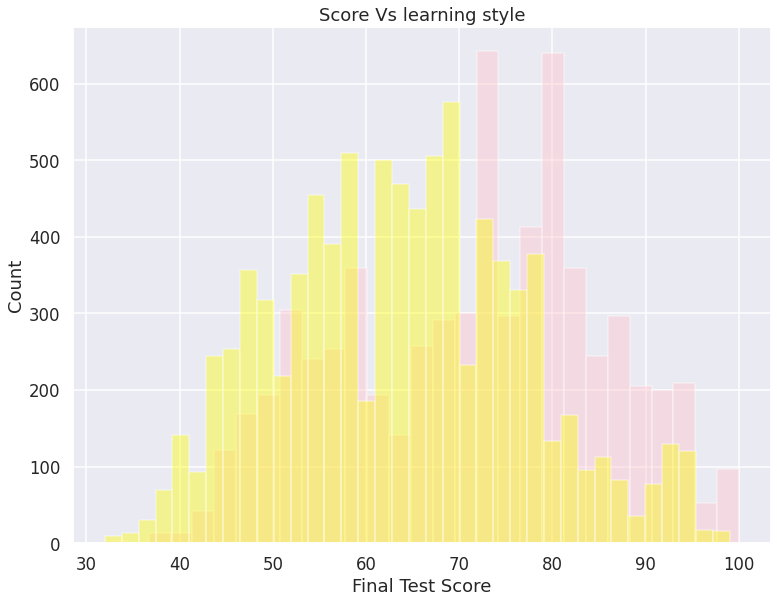

In [382]:
# distribution of score against learning_style:  Visual
style = 'visual'
print(f'distribution of score against learning_style:  {style}')
df_Visual = df[ df['learning_style'] == style ]
sns.distplot(df_Visual['final_test'], kde=False, color='pink').set(xlabel="Final Test Score", ylabel="Count")

# distribution of score against learning_style:  Visual
style = 'auditory'
print(f'distribution of score against learning_style:  {style}')
df_Visual = df[ df['learning_style'] == style ]
sns.distplot(df_Visual['final_test'], kde=False, color='yellow').set(xlabel="Final Test Score", ylabel="Count", title="Score Vs learning style")

In this plot, 
- the pink color represents the distribution of final_test for students with 'Visual' learning_style. 
- the yellow color represents the distribution of final_test for students with 'Auditory' learning_style.
- the orange color is combined areafor both 'Visual' and 'Auditory'.

It is very clear that, students with 'Visual' learning_style obtained high marks as compared to students with 'Auditory' learning style.


#### mode_of_transport

In [73]:
modes_of_transport = list(df['mode_of_transport'].unique())
modes_of_transport

['private transport', 'public transport', 'walk']

distribution of score against mode_of_transport:  private transport


[Text(0, 0.5, 'Students who takes private transport'),
 Text(0.5, 0, 'Final Test Score')]

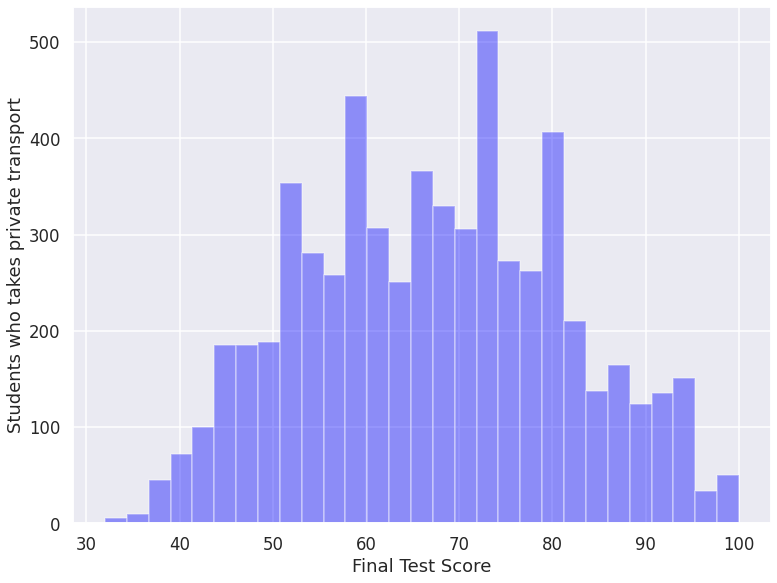

In [388]:
mode_of_transport = 'private transport'
print(f'distribution of score against mode_of_transport:  {mode_of_transport}')
tmp = df[ df['mode_of_transport'] == mode_of_transport ]
sns.distplot(tmp['final_test'], kde=False, color='blue').set(xlabel="Final Test Score", ylabel="Students who takes private transport")

distribution of score against mode_of_transport:  public transport


[Text(0, 0.5, 'Students who take public transport to school'),
 Text(0.5, 0, 'Final Test Score')]

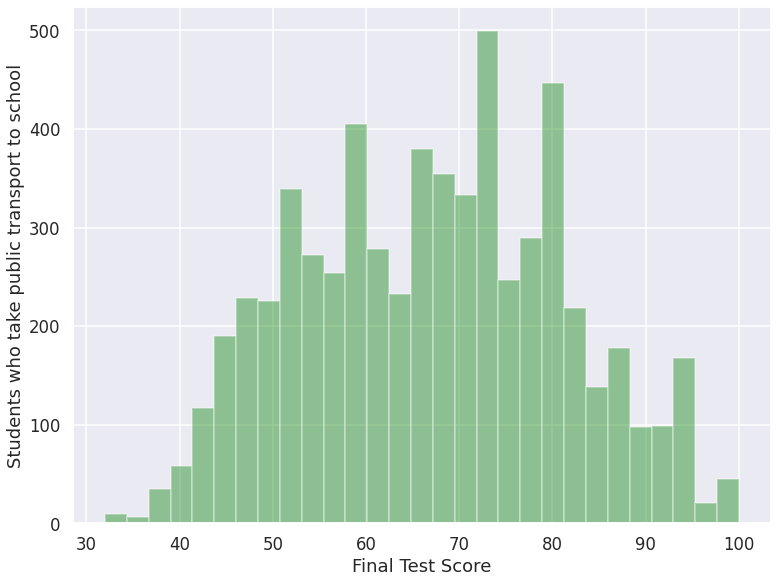

In [386]:
mode_of_transport = 'public transport'
print(f'distribution of score against mode_of_transport:  {mode_of_transport}')
tmp = df[ df['mode_of_transport'] == mode_of_transport ]
sns.distplot(tmp['final_test'], kde=False, color='green').set(xlabel="Final Test Score", ylabel="Students who takes public transport")

distribution of score against mode_of_transport:  walk


[Text(0, 0.5, 'Students who walks to school'),
 Text(0.5, 0, 'Final Test Score')]

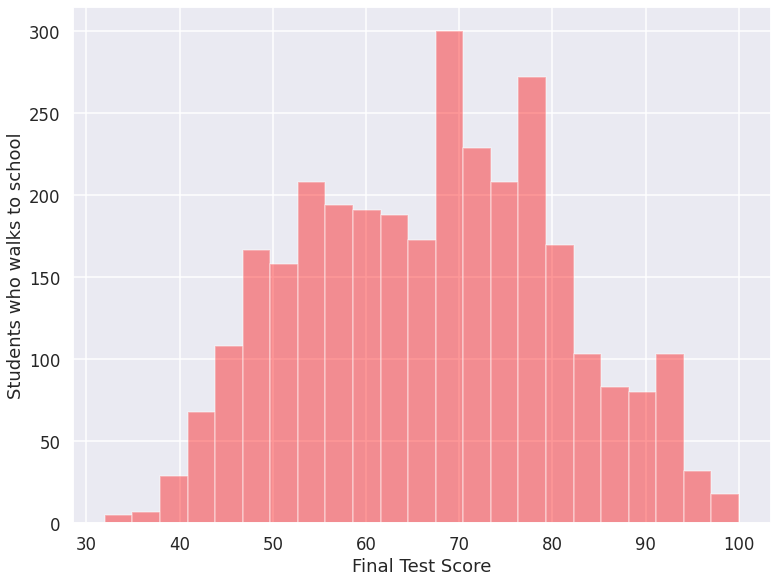

In [387]:
mode_of_transport = 'walk'
print(f'distribution of score against mode_of_transport:  {mode_of_transport}')
tmp = df[ df['mode_of_transport'] == mode_of_transport ]
sns.distplot(tmp['final_test'], kde=False, color='red').set(xlabel="Final Test Score", ylabel="Students who walks to school")

No major impact by mode_of_transport

#### Boy's, Girl's & Mixed School

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Final Test Score'),
 Text(0.5, 1.0, 'Mixed School')]

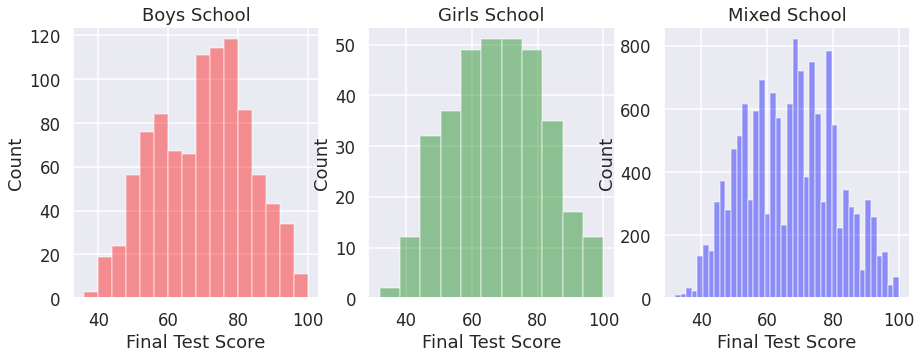

In [389]:
# Let's analyse the distribution of test score for boy's, girl's and mixed school

boys_df = df[ df.n_female == 0 ]
girls_df= df[ df.n_male == 0]
mixed_df= df[ (df.n_male > 0) & (df.n_female > 0)]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

sns.distplot(boys_df['final_test'], kde=False, color='red', ax=ax1).set(xlabel="Final Test Score", ylabel="Count", title='Boys School')
sns.distplot(girls_df['final_test'], kde=False, color='green', ax=ax2).set(xlabel="Final Test Score", ylabel="Count", title='Girls School')
sns.distplot(mixed_df['final_test'], kde=False, color='blue', ax=ax3).set(xlabel="Final Test Score", ylabel="Count", title='Mixed School')

In the plots above, we can see that the number of samples for Boys and Girls school  is less than of mixed school. But the distribution of final_test seems similar in each case.

#### Bag Color

In [390]:
bag_colors = list(df['bag_color'].unique())
bag_colors

['yellow', 'green', 'white', 'red', 'blue', 'black']

distribution of score against bag_color:  yellow


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Final Test Score')]

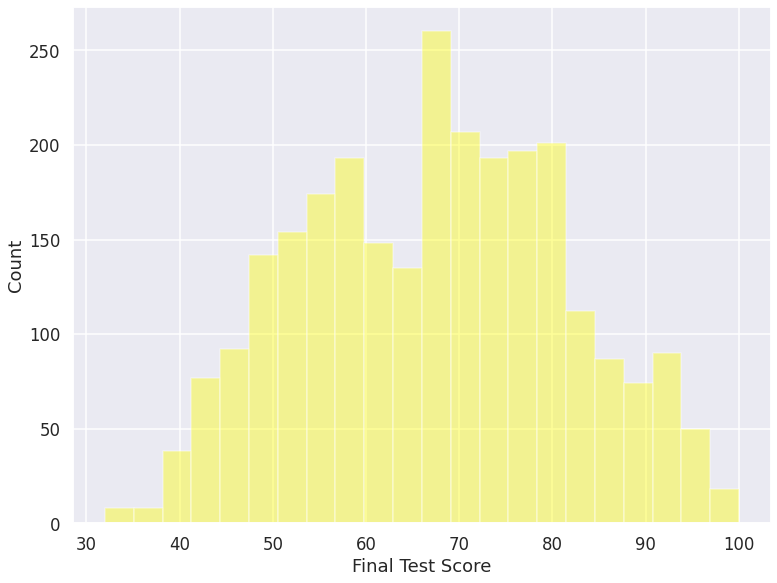

In [391]:
bag_color = 'yellow'
print(f'distribution of score against bag_color:  {bag_color}')
df_Visual = df[ df['bag_color'] == bag_color ]
sns.distplot(df_Visual['final_test'], kde=False, color='yellow').set(xlabel="Final Test Score", ylabel="Count")

distribution of score against bag_color:  green


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Final Test Score')]

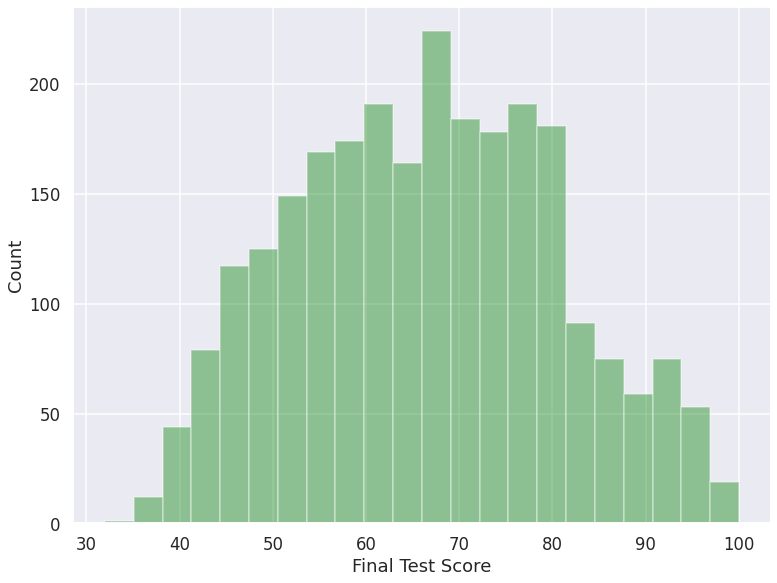

In [392]:
bag_color = 'green'
print(f'distribution of score against bag_color:  {bag_color}')
df_Visual = df[ df['bag_color'] == bag_color ]
sns.distplot(df_Visual['final_test'], kde=False, color='green').set(xlabel="Final Test Score", ylabel="Count")

distribution of score against bag_color:  white


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Final Test Score')]

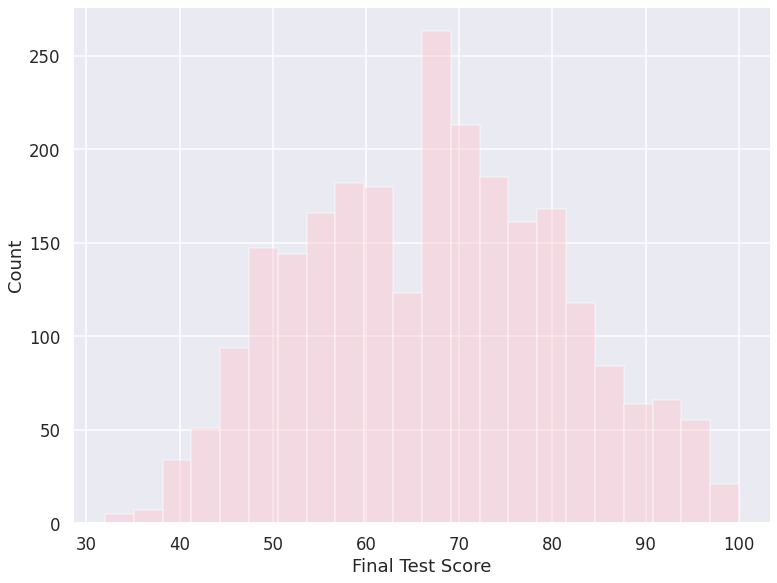

In [393]:
bag_color = 'white'
print(f'distribution of score against bag_color:  {bag_color}')
df_Visual = df[ df['bag_color'] == bag_color ]
sns.distplot(df_Visual['final_test'], kde=False, color='pink').set(xlabel="Final Test Score", ylabel="Count")

distribution of score against bag_color:  red


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Final Test Score')]

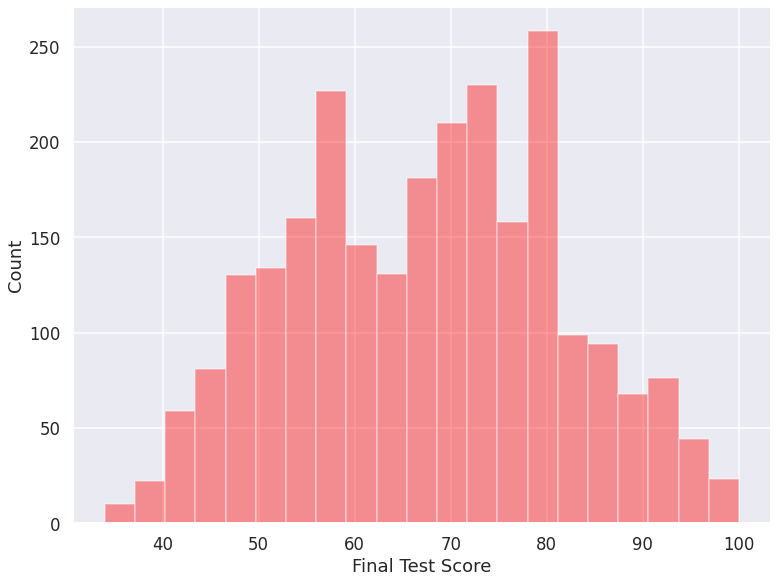

In [394]:
bag_color = 'red'
print(f'distribution of score against bag_color:  {bag_color}')
df_Visual = df[ df['bag_color'] == bag_color ]
sns.distplot(df_Visual['final_test'], kde=False, color='red').set(xlabel="Final Test Score", ylabel="Count")

distribution of score against bag_color:  blue


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Final Test Score')]

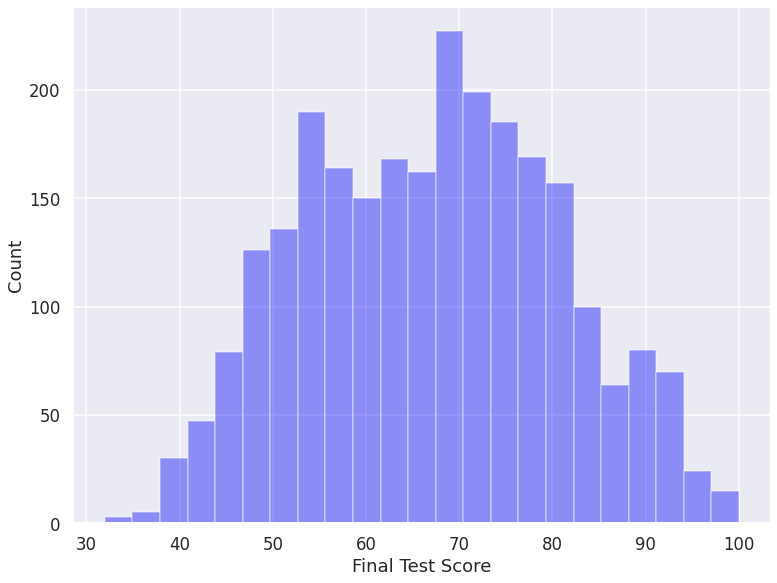

In [395]:
bag_color = 'blue'
print(f'distribution of score against bag_color:  {bag_color}')
df_Visual = df[ df['bag_color'] == bag_color ]
sns.distplot(df_Visual['final_test'], kde=False, color='blue').set(xlabel="Final Test Score", ylabel="Count")

distribution of score against bag_color:  black


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Final Test Score')]

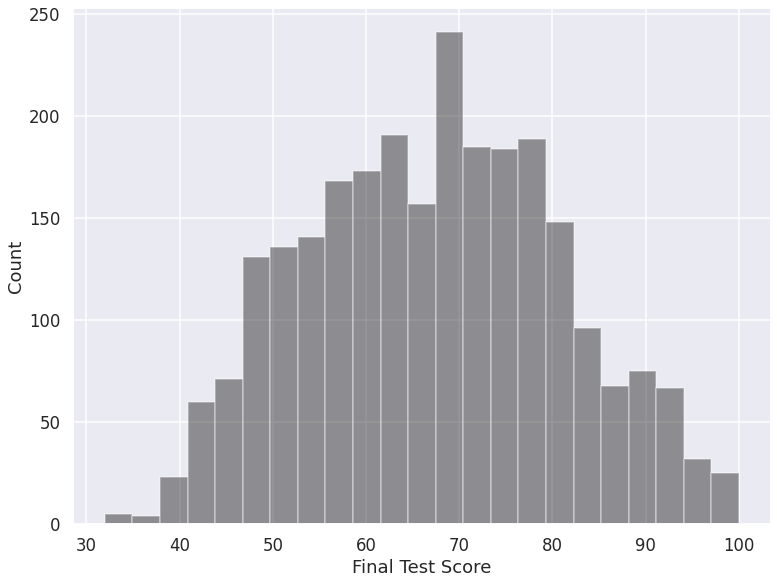

In [396]:
bag_color = 'black'
print(f'distribution of score against bag_color:  {bag_color}')
df_Visual = df[ df['bag_color'] == bag_color ]
sns.distplot(df_Visual['final_test'], kde=False, color='black').set(xlabel="Final Test Score", ylabel="Count")

There is not any major impact of bag color on final test score of student

---



#### Correlation between target and other columns

In [397]:
corr_ = df.corr()
corr_

,number_of_siblings,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_hours
number_of_siblings,1.000000,-0.363767,-0.000645,-0.047592,-0.008277,0.085327,-0.122420,-0.107147
final_test,-0.363767,1.000000,-0.149152,-0.171978,0.014771,-0.148254,0.349375,0.327213
n_male,-0.000645,-0.149152,1.000000,-0.795446,0.002086,0.026283,-0.053788,-0.055329
n_female,-0.047592,-0.171978,-0.795446,1.000000,-0.014677,0.024003,-0.046394,-0.040497
age,-0.008277,0.014771,0.002086,-0.014677,1.000000,-0.008454,0.003983,-0.001659
hours_per_week,0.085327,-0.148254,0.026283,0.024003,-0.008454,1.000000,0.143873,0.123569
attendance_rate,-0.122420,0.349375,-0.053788,-0.046394,0.003983,0.143873,1.000000,0.887336
sleep_hours,-0.107147,0.327213,-0.055329,-0.040497,-0.001659,0.123569,0.887336,1.000000


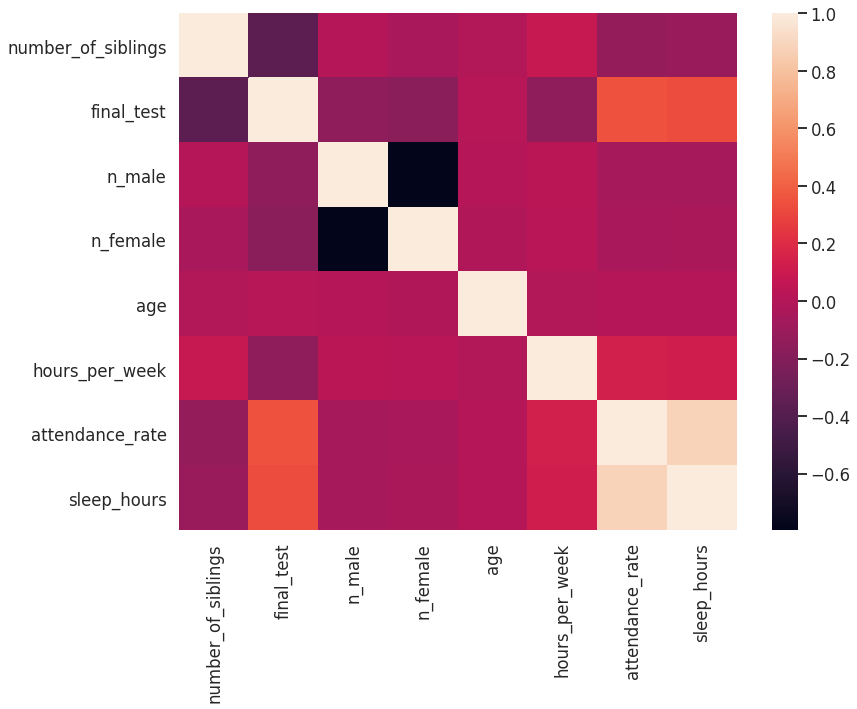

In [398]:
# correlation through heatmap
sns.heatmap(corr_)

Among the factors, attendance rate (correlation coefficient = 0.35) and sleeping hours (correlation coefficient 0.34) shows the highest positive correlation with Final test score. Furthermore, we see strong link between sleeping hours and attendance rate as both factors have a high positive correlation coefficient of 0.88.

The number of siblings is negatively correlated to final test score with correlation coefficient (-0.32), i.e an inverse relationship between these 2 factors may be possible.








### Analysis on Numeric Columns

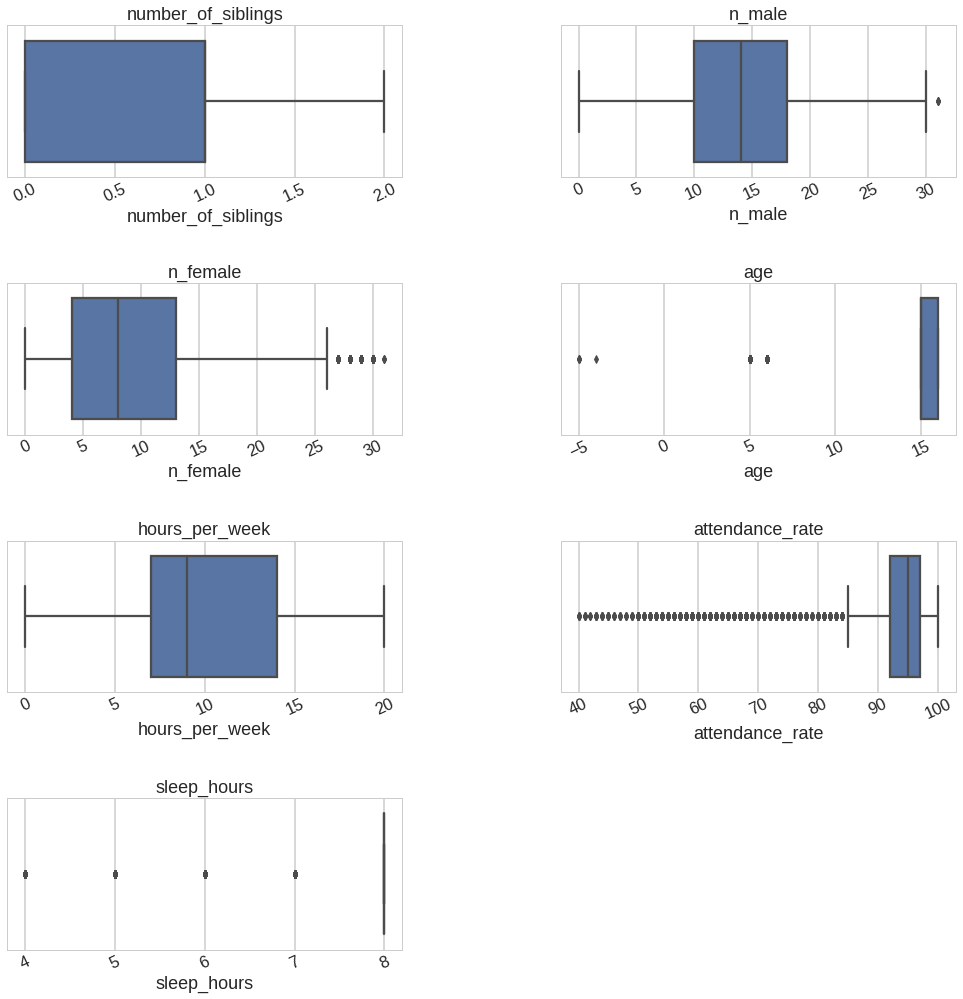

In [399]:
# Plot distribution of all numeric features
plot_distribution(df, num_cols, cols=2, rows=4, width=17, height=17, hspace=0.7, wspace=0.4)

In [400]:
# create heatmap for numeric columns and try to identify features that are weakly correlated with the target_col.
import scipy.stats as ss
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    if (confusion_matrix.shape[0]==0):
        return np.nan
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    if(phi2corr==0 or min((kcorr-1),(rcorr-1))==0):
        return np.nan
    else:
        return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

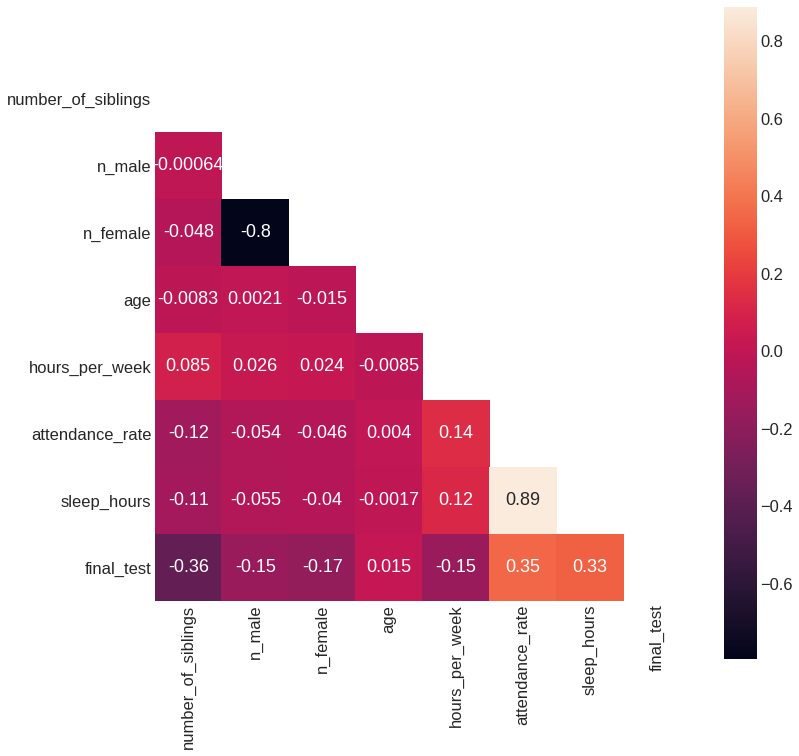

In [403]:
corr = df[np.append(num_cols,target_col)].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr,mask=mask, annot=True, square=True);
# plt.savefig("num.png")

As shown above, age has the weakest correlation with final_test. There is a good reason not to include age in the features for training. 

Interestingly, sleep_hours and attendance_rate is strongly correlated. May only use one of the two in linear regression. 